In [1]:
import random
import numpy as np
import math
from matplotlib import pyplot as plt  
import pandas as pd
%matplotlib inline

In [2]:
# bounded random walk
def create_training_list():
    training_list = []
    for i in range(10): 
        training_seq = [np.array([0,0,1,0,0])]
        current_state = 0
        while abs(current_state) != 3:
            direction = random.choice(["left", "right"])
            if direction == "left":
                current_state = current_state - 1
            else:
                current_state = current_state + 1
            s = np.array([0,0,0,0,0])
            if current_state == 3:
                s = np.array([1,1,1,1,1])
            elif current_state == -3:
                s = np.array([0,0,0,0,0])
            else: s[current_state + 2] = 1 
            training_seq.append(s)
        training_list.append(training_seq) 
    return training_list

def get_delta_w(training_seq, w, alpha, lamda):       
    delta_w = np.array([0,0,0,0,0])
    sum_value = np.array([0,0,0,0,0])
    for t in range(len(training_seq)-1):
        sum_value = training_seq[t] + lamda*(sum_value)
        if t < len(training_seq)-2:
            delta_w = delta_w + alpha*(np.dot(training_seq[t+1],w) - np.dot(training_seq[t],w))*sum_value
            #print(training_seq[i+1])
        else:
            delta_w = delta_w + alpha*(training_seq[t+1][0] - np.dot(training_seq[t],w))*sum_value            
    return delta_w

def e1_get_RMSE(training_list, alpha, lamda):
    w = np.array([0.5,0.5,0.5,0.5,0.5])
    iterations = 0
    w_change = 1
    while w_change > 0.0001:
        total_delta_w = np.array([0,0,0,0,0])
        for training_seq in training_list:
            delta_w = get_delta_w(training_seq, w, alpha, lamda)
            iterations = iterations + 1
            total_delta_w = total_delta_w + delta_w
        w_change = max(abs(total_delta_w))
        w = w + total_delta_w
    #print iterations
    RMSE = math.sqrt(sum((w-true_w)*(w-true_w))/5)
    return RMSE

def e2_get_RMSE(training_list, alpha, lamda):
    w = np.array([0.5,0.5,0.5,0.5,0.5])
    for training_seq in training_list:
        delta_w = get_delta_w(training_seq, w, alpha, lamda)
        w = w + delta_w
    RMSE = math.sqrt(sum((w-true_w)*(w-true_w))/5)
    return RMSE

In [3]:
#Create 100 training sets
all_training = []
for i in range(200):
    training_list = create_training_list()
    all_training.append(training_list)

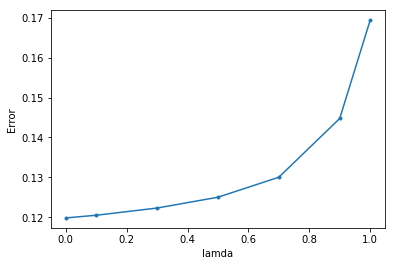

In [4]:
# Experiment 1
true_w = np.array([1.0/6.0,2.0/6.0,3.0/6.0,4.0/6.0,5.0/6.0])
total_RMSE_0 = 0
total_RMSE_01 = 0
total_RMSE_03 = 0
total_RMSE_05 = 0
total_RMSE_07 = 0
total_RMSE_09 = 0
total_RMSE_1 = 0

for training_list in all_training[0:100]:    
    total_RMSE_0 = total_RMSE_0 + e1_get_RMSE(training_list, 0.01, 0)
    total_RMSE_01 = total_RMSE_01 + e1_get_RMSE(training_list, 0.01, 0.1)
    total_RMSE_03 = total_RMSE_03 + e1_get_RMSE(training_list, 0.01, 0.3)
    total_RMSE_05 = total_RMSE_05 + e1_get_RMSE(training_list, 0.01, 0.5)
    total_RMSE_07 = total_RMSE_07 + e1_get_RMSE(training_list, 0.01, 0.7)
    total_RMSE_09 = total_RMSE_09 + e1_get_RMSE(training_list, 0.01, 0.9)
    total_RMSE_1 = total_RMSE_1 + e1_get_RMSE(training_list, 0.01, 1)

RMSE_0 = total_RMSE_0/100
RMSE_01 = total_RMSE_01/100
RMSE_03 = total_RMSE_03/100
RMSE_05 = total_RMSE_05/100
RMSE_07 = total_RMSE_07/100
RMSE_09 = total_RMSE_09/100
RMSE_1 = total_RMSE_1/100

Error = [RMSE_0, RMSE_01, RMSE_03, RMSE_05, RMSE_07, RMSE_09, RMSE_1]
lamda = [0,0.1,0.3,0.5,0.7,0.9,1] 

plt.plot(lamda, Error, '.-')
plt.xlabel('lamda')
plt.ylabel('Error')

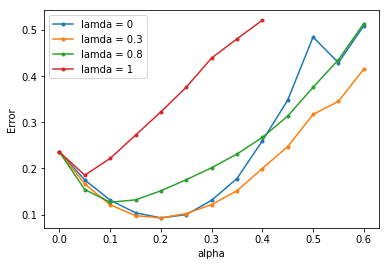

In [5]:
# Experiment 2
true_w = np.array([1.0/6.0,2.0/6.0,3.0/6.0,4.0/6.0,5.0/6.0])
    
all_RMSE = []
alpha_list = []
lamda_list = []

for lamda in [0, 0.3, 0.8]:
    RMSE = []
    for alpha in [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]:
        total_RMSE = 0
        total = 0
        n = 0
        for training_list in all_training:
            current_RMSE = e2_get_RMSE(training_list, alpha, lamda)
            total = total + 1
            #print current_RMSE
            if current_RMSE < 2 and n < 100:
                total_RMSE = total_RMSE + current_RMSE
                n = n+1
            if n == 100: 
                #print total
                break
        RMSE.append(total_RMSE/n)
    all_RMSE.append(RMSE)

Alpha = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
RMSE_0 = all_RMSE[0]
RMSE_03 = all_RMSE[1]
RMSE_08 = all_RMSE[2]
    
RMSE_1 = []
for alpha in [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]:
    total_RMSE = 0
    n = 0
    total = 0
    for training_list in all_training:
        current_RMSE = e2_get_RMSE(training_list, alpha, 1)
        total = total + 1
            #print current_RMSE
        if current_RMSE < 2 and n < 100:
            total_RMSE = total_RMSE + current_RMSE
            n = n+1
        if n == 100: 
                #print total
                break
    RMSE_1.append(total_RMSE/n) 
    #print n
Alpha_1 = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]

plt.plot(Alpha,RMSE_0,".-",label="lamda = 0")  
plt.plot(Alpha,RMSE_03,".-",label="lamda = 0.3") 
plt.plot(Alpha,RMSE_08,".-",label="lamda = 0.8")
plt.plot(Alpha_1,RMSE_1,".-",label="lamda = 1") 
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Error')

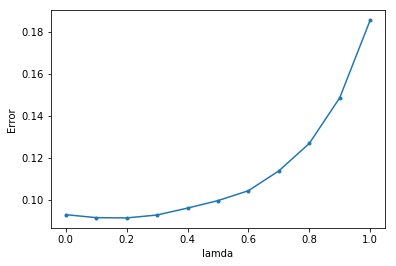

In [6]:
#Experiment 3
true_w = np.array([1.0/6.0,2.0/6.0,3.0/6.0,4.0/6.0,5.0/6.0])

best_alpha_list = []
for lamda in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    best_alpha = 0
    best_RMSE = 100
    for alpha in [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]:
        total_RMSE = 0
        n = 0
        for training_list in all_training:
            current_RMSE = e2_get_RMSE(training_list, alpha, lamda)
            #print current_RMSE
            if current_RMSE < 2 and n < 100:
                total_RMSE = total_RMSE + current_RMSE
                n = n+1
        if (total_RMSE/n) < best_RMSE:
            best_RMSE = total_RMSE/n
            best_alpha = alpha
    best_alpha_list.append(best_alpha)
   
lamda_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
best_RMSE_list = []
for i in range(11):
    total_RMSE = 0
    n = 0
    for training_list in all_training:
        current_RMSE = e2_get_RMSE(training_list, best_alpha_list[i], lamda_list[i])
        #print current_RMSE
        if current_RMSE < 2 and n < 100:
            total_RMSE = total_RMSE + current_RMSE
            n = n+1
    best_RMSE_list.append(total_RMSE/n)
    
plt.plot(lamda_list,best_RMSE_list,".-")  
plt.xlabel('lamda')
plt.ylabel('Error')